Data

In [19]:
import csv
import pandas as pd
import numpy as np
data = pd.read_csv("D:/IMT MInes Ales/S9/Hackathon/2ia-2024-hackathon/left_accs.csv", sep=",", header=None)
data.head(50)

,0,1,2,3
0,1.721419e+09,-36,284,-232
1,1.721419e+09,-224,-92,-60
2,1.721419e+09,-236,-96,-64
3,1.721419e+09,-240,-96,-72
4,1.721419e+09,-252,-108,-80
5,1.721419e+09,-248,-108,-80
6,1.721419e+09,-244,-104,-76
7,1.721419e+09,-236,-100,-64
8,1.721419e+09,-240,-96,-68
9,1.721419e+09,-244,-104,-68


In [ ]:
import datetime
import pytz

data[0] = data[0].apply(
    lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')
)



C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_31148\469374765.py:5: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  lambda x: datetime.datetime.utcfromtimestamp(x).strftime('%Y-%m-%d %H:%M:%S')


In [3]:
data.head(100)

,0,1,2,3
0,2024-07-19 22:00:05,-36,284,-232
1,2024-07-19 22:00:05,-224,-92,-60
2,2024-07-19 22:00:05,-236,-96,-64
3,2024-07-19 22:00:05,-240,-96,-72
4,2024-07-19 22:00:05,-252,-108,-80
...,...,...,...,...
95,2024-07-19 22:00:06,-248,-108,-68
96,2024-07-19 22:00:06,-244,-112,-72
97,2024-07-19 22:00:07,-236,-108,-68
98,2024-07-19 22:00:07,-240,-104,-68


In [4]:
import pandas as pd
import numpy as np

# Sample data


# Create DataFrame
df = pd.DataFrame(data)

df['datestamp'] = pd.to_datetime(df[0])

# # Calculate displacement
# df['x_diff'] = df[1].diff().fillna(0)
# df['y_diff'] = df[2].diff().fillna(0)
# df['z_diff'] = df[3].diff().fillna(0)
df['displacement'] = np.sqrt(df[1]**2 + df[2]**2 + df[3]**2)


df = df.drop(columns=[ 'datestamp'])

# print(df)
df['timestamp'] = pd.to_datetime(df[0])
# df.set_index(df[0], inplace=True)
df.set_index('timestamp', inplace=True)
df.to_csv("dataset_left.csv")

In [5]:
df

,0,1,2,3,displacement
timestamp,,,,,
2024-07-19 22:00:05,2024-07-19 22:00:05,-36,284,-232,368.477950
2024-07-19 22:00:05,2024-07-19 22:00:05,-224,-92,-60,249.479458
2024-07-19 22:00:05,2024-07-19 22:00:05,-236,-96,-64,262.693738
2024-07-19 22:00:05,2024-07-19 22:00:05,-240,-96,-72,268.328157
2024-07-19 22:00:05,2024-07-19 22:00:05,-252,-108,-80,285.601120
...,...,...,...,...,...
2024-07-27 10:00:01,2024-07-27 10:00:01,36,-180,-204,274.430319
2024-07-27 10:00:01,2024-07-27 10:00:01,36,-180,-204,274.430319
2024-07-27 10:00:01,2024-07-27 10:00:01,36,-180,-204,274.430319


In [11]:
df = df.drop(columns=[0])
df_resampled = df.resample('100L').mean().interpolate(method='time')
df_resampled

C:\Users\Visal Kao\AppData\Local\Temp\ipykernel_31148\1879821004.py:2: FutureWarning: 'L' is deprecated and will be removed in a future version, please use 'ms' instead.
  df_resampled = df.resample('100L').mean().interpolate(method='time')


,1,2,3,displacement
timestamp,,,,
2024-07-19 22:00:05.000,-238.893617,-91.744681,-70.382979,273.536763
2024-07-19 22:00:05.100,-239.420255,-92.602213,-69.904681,273.387778
2024-07-19 22:00:05.200,-239.946894,-93.459745,-69.426383,273.238794
2024-07-19 22:00:05.300,-240.473532,-94.317277,-68.948085,273.089809
2024-07-19 22:00:05.400,-241.000170,-95.174809,-68.469787,272.940824
...,...,...,...,...
2024-07-27 10:00:00.600,35.770667,-180.064000,-204.522667,274.834154
2024-07-27 10:00:00.700,35.772444,-180.048000,-204.503111,274.809260
2024-07-27 10:00:00.800,35.774222,-180.032000,-204.483556,274.784366


<Axes: xlabel='timestamp'>

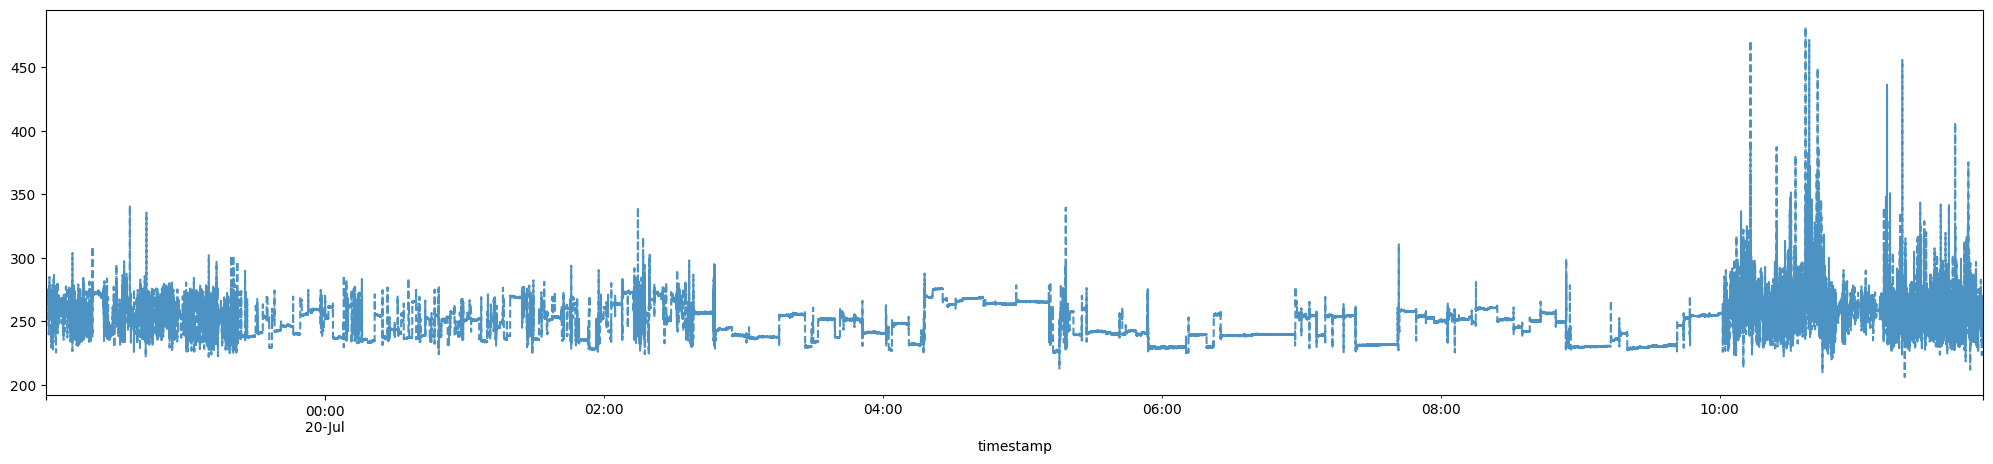

In [14]:
from matplotlib import pyplot as plt 
# df['timestamp'] = pd.to_datetime(df[0])
# plt.plot(data[1], data[0])
# new_df = df.sort_values(by=0)
# df = df.iloc[50:, :]
# plt.plot(df[0].asfreq(1000), df['displacement'])
# df.set_index("timestamp", inplace=True)
# df

# df = df.drop(columns = [0])
# df_resampled = df.resample('100L').mean()
# len(df_resampled_new)
df_resampled_new = df_resampled.head(1000000)
plt.figure(figsize=(25,5))
df_resampled_new["displacement"].plot(alpha=0.8, style='--')
# data = 